# Question 1 Quick Sort Implementation

In [9]:
def partition(A, p, r):
    #pivot element to be placed in the correct position in A
    x = A[r] 
    #i = index of smaller element, holds current correct position
    i = p - 1
    
    #loop through array p to r-1 
    for j in range(p, r):
        #if the current element < pivot
        if A[j] <= x:
            #increment index of smaller element and swap
            i += 1
            #swap A[i] and A[j]
            A[i], A[j] = A[j], A[i]
    #swap A[i+1] and A[r]
    A[i+1], A[r] = A[r], A[i+1]
    return i + 1
    
    
def quickSort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quickSort(A, p, q-1)
        quickSort(A, q+1, r)

#to sort A, call quickSort(A, 0, len(A) - 1)
#this is a divide and conquer algorithm
#take the last element as the pivot and increment through the array until the pivot is in the correct place
#call quickSort of the left subarray (all elements < pivot)
#call quickSort of right subarray (all elements > pivot)
#since this is recursive, p = r (no elements left to sort)

# Question 1-(1-3) QuickSort Random, Best, and Worst Case

In [38]:
from timeit import default_timer as timer

# Create 3 input arrays
# random_set = 1000 randomly generated integers from the range 0-1000
# best_set = sorted array of integers from 0 to 1000 
# worst_set = reverse-sorted array of integers from 0 to 1000
random_set, best_set, worst_set = [], [], []
random_set.append(np.random.randint(0, 1000, 1000))
best_set.append(np.arange(0, 1000))
worst_set.append(np.arange(1000, 0, -1))
    

# Measure and print the running time of the three inputs
start = timer()
quickSort(random_set, 0, len(random_set) - 1)
end = timer()
print(f'Running time with random input: {end - start}')
    
start = timer()
quickSort(best_set, 0, len(best_set) - 1)
end = timer()
print(f'Running time with best input: {end - start}')
    
start = timer()
quickSort(worst_set, 0, len(worst_set) - 1)
end = timer()
print(f'Running time with worst input: {end - start}')

Running time with random input: 5.1000009989365935e-05
Running time with best input: 5.9399986639618874e-05
Running time with worst input: 5.570000212173909e-05


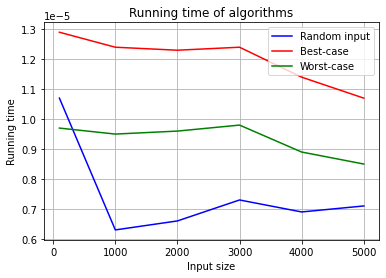

In [32]:
import numpy as np
# Import timer lib. to measure running time
from timeit import default_timer as timer
# Import plot lib. to plot results
import matplotlib.pyplot as plt


# Generate inputs, e.g., when n=100, n=1000, n=2000, ..., n=5000
size = [100, 1000, 2000, 3000, 4000, 5000]

# Generate different types of inputs
# - random_set: randomly generated integer in the range from 0 to 1000000
# - best_set: generate integer in ascending order (sorted)
# - worst_set: generate integer in descending order
random_set, best_set, worst_set = [], [], []
for i in range(0, len(size)):
    random_set.append(np.random.randint(0, 1000, size[i]))
    best_set.append(np.arange(0, size[i]))
    worst_set.append(np.arange(size[i], 0, -1))
    

# We measure running time of algorithm for individual input sets
elapsed_time_random, elapsed_time_best, elapsed_time_worst = [], [], []
for i in range(0, len(random_set)):
    start = timer()
    quickSort(random_set[i], 0, len(random_set) - 1)
    end = timer()
    elapsed_time_random.append(end-start)
    
    start = timer()
    quickSort(best_set[i], 0, len(best_set) - 1)
    end = timer()
    elapsed_time_best.append(end-start)
    
    start = timer()
    quickSort(worst_set[i], 0, len(worst_set) - 1)
    end = timer()
    elapsed_time_worst.append(end-start)
    
# plot the running time results
plt.plot(size, elapsed_time_random, color='blue', label='Random input')
plt.plot(size, elapsed_time_best, color='red', label='Best-case')
plt.plot(size, elapsed_time_worst, color='green', label='Worst-case')
plt.title("Running time of algorithms")
plt.xlabel("Input size")
plt.ylabel("Running time")
plt.grid(True)
plt.legend()
plt.show()

## Question 1-(4) Comparision of Running Times

The running time of Q1-(2) and Q1-(3) are greater than the running time of Q1-(1) because the random input represents the average running time which is O(nlogn). The best case of quick sort is when the pivot is the mean element. For both the sorted and reverse-sorted input arrays, the pivot element is always the last element in the array, not the mean. This is why they both run slower than O(nlogn).

## Question 1-(5) Quick Sort Improvement

Quick sort can be improved by adjusting the starting pivot. Here, I choose the pivot as the middle element (the mean element for the sorted and reverse-sorted inputs) to start. The implementations and running times are below:

In [41]:
def partition(A, p, r):
    #pivot element to be placed in the correct position in A
    x = A[p//r] 
    #i = index of smaller element, holds current correct position
    i = p - 1
    
    #loop through array p to r-1 
    for j in range(p, r):
        #if the current element < pivot
        if A[j] <= x:
            #increment index of smaller element and swap
            i += 1
            #swap A[i] and A[j]
            A[i], A[j] = A[j], A[i]
    #swap A[i+1] and A[r]
    A[i+1], A[r] = A[r], A[i+1]
    return i + 1
    
    
def quickSort(A, p, r):
    if p < r:
        q = partition(A, p, r)
        quickSort(A, p, q-1)
        quickSort(A, q+1, r)

#to sort A, call quickSort(A, 0, len(A) - 1)
#this is a divide and conquer algorithm
#take the last element as the pivot and increment through the array until the pivot is in the correct place
#call quickSort of the left subarray (all elements < pivot)
#call quickSort of right subarray (all elements > pivot)
#since this is recursive, p = r (no elements left to sort)

from timeit import default_timer as timer

# Create 3 input arrays
# random_set = 1000 randomly generated integers from the range 0-1000
# best_set = sorted array of integers from 0 to 1000 
# worst_set = reverse-sorted array of integers from 0 to 1000
random_set, best_set, worst_set = [], [], []
random_set.append(np.random.randint(0, 1000, 1000))
best_set.append(np.arange(0, 1000))
worst_set.append(np.arange(1000, 0, -1))
    

# Measure and print the running time of the three inputs
start = timer()
quickSort(random_set, 0, len(random_set) - 1)
end = timer()
print(f'Running time with random input: {end - start}')
    
start = timer()
quickSort(best_set, 0, len(best_set) - 1)
end = timer()
print(f'Running time with best input: {end - start}')
    
start = timer()
quickSort(worst_set, 0, len(worst_set) - 1)
end = timer()
print(f'Running time with worst input: {end - start}')

Running time with random input: 5.359998613130301e-05
Running time with best input: 4.130000888835639e-05
Running time with worst input: 5.099999543745071e-05


# Question 2 Heap Sort

In [52]:
import numpy as np

def minHeapify(A, n, i):
    #store left, right values
    l = 2 * i + 1
    r = 2 * i + 2
    
    #if left child < root
    if l < n and A[l] < A[i]:
        smallest = l
    else:
        smallest = i
    
    #if right child < current smallest
    if r < n and A[r] < A[smallest]:
        smallest = r
    
    #if smallest is not root, exchange A[i] and A[smallest], and recurse
    if smallest != i:
        A[i], A[smallest] = A[smallest], A[i]
        minHeapify(A, n, smallest)
    
def buildMinHeap(A, n):
    for i in range(int(n/2 - 1), -1, -1):
        minHeapify(A, n, i)

def heapSort(A, n):
    buildMinHeap(A, n)
    for i in range(n - 1, -1, -1):
        A[0], A[i] = A[i], A[0]
        minHeapify(A, i, 0)

random_input = np.random.randint(0, 1000, 20)
print(f'Randomly-generated input: {random_input}')
heapSort(random_input, len(random_input))
print(f'Sorted array in decending order: {random_input}')

Randomly-generated input: [106 363 930 829 838 793 249 180 186 327 346 348  59 129 501 569 482 726
 316  45]
Sorted array in decending order: [930 838 829 793 726 569 501 482 363 348 346 327 316 249 186 180 129 106
  59  45]


# Question 3 Smallest Missing Positive Integer

In [75]:
# this function partitions the array splitting it into + and - subarrays
# in-place (no extra space needed)
# return the number of negative ints, 0
def partition(A, n):
    count = 0
    for i in range(n):
        if A[i] <= 0:
            A[i], A[count] = A[count], A[i]
            count += 1
    return count

# this function calls partition to find the number of non-pos ints
# then, it modifies A to only hold positive ints and calculates the new size
# iterate through A and mark each element by changing its sign
# iterate through once again and find the fist pos val 
# return the index + 1 of the current iteration for smallest pos missing int
def findMissingPosInt(A, n):
    # find the pivot (starting element of + subarray)
    pivot = partition(A, n)
    
    # modify A to hold only positive ints
    A = A[pivot:]
    # calculate new size of A
    newSize = n - pivot
    
    for i in range(newSize):
        if(abs(A[i]) - 1 < newSize and A[abs(A[i]) - 1] > 0):
            A[abs(A[i]) - 1] = -A[abs(A[i]) - 1]
    
    for j in range(newSize):
        if A[j] > 0:
            return j + 1
    return newSize + 1

A = [-100, 10, 5, 6, -62, 23, 14, 4, 7, -78, 3, -12, 94, 97, -32, 1, 2]
piv = partition(A, len(A))
print(f'Number of non-positive integers: {piv}')
print(f'Partitioned array: \n{A}')
number = findMissingPosInt(A, len(A))
print(f'Smallest missing positive integer: {number}')

Number of non-positive integers: 5
Partitioned array: 
[-100, -62, -78, -12, -32, 23, 14, 4, 7, 5, 3, 6, 94, 97, 10, 1, 2]
Smallest missing positive integer: 8


# Question 4: Max-Min Problem

In [50]:
def findMaxMin(A, l, r, minN, maxN):
    # if there is only one element in A
    if l == r:
        if minN > A[r]: minN = A[r]
        if maxN < A[l]: maxN = A[l]
        
        return minN, maxN
    
    # if there are only two elements in A
    if r - l == 1:
        if A[l] < A[r]:
            if minN > A[l]: minN = A[l]
            if maxN < A[r]: maxN = A[r]
        else:
            if minN > A[r]: minN = A[r]
            if maxN < A[l]: maxN = A[l]
        
        return minN, maxN
    
    # calculate middle element
    m = (l + r) // 2
    
    # recurse for left subarray
    minN, maxN = findMaxMin(A, l, m, minN, maxN)
    
    # recurse for right subarray
    minN, maxN = findMaxMin(A, m + 1, r, minN, maxN)
    
    return minN, maxN


# driver code
A = [-100, 10, 5, 6, -62, 23, 14, 4, 7, -78, 3, -12, 94, 97, -32, 1, 2]
left = 0
right = len(A) - 1
minN, maxN = 0, 0
(minNum, maxNum) = findMaxMin(A, left, right, minN, maxN)
print(f'Maximum: {maxNum}')
print(f'Minimum: {minNum}')

Maximum: 97
Minimum: -100


# Question 5-(1) Maximum Profit Problem

In [38]:
import numpy as np
from timeit import default_timer as timer

# this is a leetcode question and this is the most optimal solution
# it uses the 2 pointer method and only iterates through the array once
# it runs at O(n) time and divide and conquer is not faster as can be seen from the running times below
def maxProfit(prices):
    maxP = 0
    leftPtr = 0
    rightPtr = 1
    
    while rightPtr < len(prices):
            if prices[leftPtr] < prices[rightPtr]:
                profit = prices[rightPtr] - prices[leftPtr]
                if profit > maxP: maxP = profit
                rightPtr += 1
            else:
                temp = rightPtr
                rightPtr += 1
                leftPtr = temp

    return maxP

# driver code
prices = np.random.randint(0, 100, 10**3)
print(f'Random input array: {prices}')
start = timer()
maxProf = maxProfit(prices)
end = timer()
print(f'Maximum profit: {maxProf}')
print(f'Execution Time: {end - start} seconds')

Random input array: [26 70 35 68 68 15 11 96 24 27 69 64 93 99 35 89 23 45 42 77 48 17 82 84
  6 30 53 52 16 90 22 60 49 53 17 86 60  2 33 47 27 81 92 95 40 41 35 41
 73 18 68 92 39 69 47 17  9  2 85  8 69 35 14 16 60 41 67 97 12 62 36 92
 82 55 28 51 14 70 35 48 53 44 61  1 76 94 14 77 86 70 48 94 68 14 90 24
 29 38 19 83 73 36 78 59 83 84 78 41 18 66 37 73 49 67 99 60  3 77 25 65
 42 91 50 90 68 58 79 96 24 24 44 52 46 15 66 20 40 18 39 12 71 41 74 23
 73 38 26 47  3 42 58 48 50 86 79 93 68  6 68 29 23 70 87 61 78  7 90 27
 38 69  7  6 42 79 73 47 21 23 86 69 16 49 57 89 70 16  6 51 87 77 65 17
 19  0 89  0 17 63 58 90 70 39  9 98 43 87 37 85 41 46 37 84 25 95  7 72
 61 51  3 34 74  3 89 15 39 23 19 56 41 65 80 29 37 18 95 70 75 97 44 62
 86  4 58 28 42 90 48 56 29 62  6 20 59 66 75 75 36 24 66 13 92 73 87  4
 60 47 48 62 46 19 39 24 20 14 44 29 33 53 29 67  7 84 54 59 50 26 78  9
 79 74 54 63 42 40 65 32 79  6 63 58 35 84 45 36 54 56 73 41 59  2 89 53
 71 23  5 71 75 93 98 36 38 47 

## Question 5-(2) Divide and Conquer Approach

In [1]:
import numpy as np
from timeit import default_timer as timer

def maxProfitRec(A):
    if len(A) <= 1: return 0
    
    # split into left subarray
    left  = A[ : int(len(A) / 2)]
    # split into right subarray
    right = A[int(len(A) / 2) : ]

    # find max in left and right subarrays
    leftProfit  = maxProfitRec(left)
    rightProfit = maxProfitRec(right)

    # calculate current max profit
    maxProfit = max(right) - min(left)

    # find the max of right, left, and max profit
    finalProfit = max(leftProfit, rightProfit, maxProfit)
    
    # return final profit
    return finalProfit

# driver code
A = np.random.randint(0, 100, 10**3)
print(f'Random input array: {A}')
left = 0
right = len(A) - 1
start = timer()
profit = maxProfitRec(A)
end = timer()
print(f'Maximum profit: {profit}')
print(f'Execution Time: {end - start} seconds')

Random input array: [65 19 45 27 68 90  6 23 30 87 77 90 93 84 30 57 80 12 76 76 68 65 56 78
 53 68 92  3 84 72 89 14 38 39 94 86 23 30 14 59  5 29  1 36 77 43 74 56
 71 17 40 81 79 47 82 93 70 25 54 19 83 93  5 36 78 92 83 36 77 81 13  7
 37 64 21 66 35 57 45 46 33 40  7 18 11 66 77 36 55  4 86  9 40 97 77 66
 18 29 56 25 99 97  5  1 94 78 14 65 29 36 43  5 50 20 13 81 25 50  9 82
 17 77 23 49 15  0 52 29 78 43 26 25 32  2 98 13 66 41 42 49  2 87 33 33
 10 58 63 37 63 58 75 66  2 13 12 61 99  6 90 92 42 62 23 18 57 48 13 95
 13 79 11  2 89  3 59 83 42  4 51 60 47 19 28 20 43 64 54 47 75 46 87 39
 46 23 88 37 16 27 66 65 12 76 24 15 14 67 39 69 94 83 65 75 47 19 54 60
 90 57 83 19 70 50 38 54 64 83 82 96 80 75 59  9 12 20 72 69 72 79 35 64
 44 34 16 21 65 74 69 89 76 65  8  2 34 53 81 16 79 49 34 98 72 10 20  0
 93 47 88  0 19 39 24 52 81 17 93 91 99 27 76 30 56 32 97 78 83 46 59 34
 26 82  0 34 62  3 22 46  6 76 31 88 65 15 15 29 69 28 89 27 79 84 85 23
 34  0 27 10 38 42 75  9 51 30 

## Question 5-(3) Comparison

My "brute force" solution is indeed faster as I indicated previously. The two pointer method runs in O(n) time and divide and conquer cannot be faster. As seen from 5-(2), divide and conquer takes O(nlogn) time and is slower than the optimal solution using 2 pointers and iterating only once.